# Name: Ajit A Gouda

# Batch:DSG0523

# Phase-4

## Assumption: You were given various crime datasets that contains all the DISTRICTS in each state and you were asked to provide the below data to the higher authorities for further action.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import  warnings
warnings.filterwarnings('ignore')

## 4.1 Create 3 clusters as below.

1. Sensitive Area's

2. Moderate Area's

3. Peaceful Area's"

In [2]:
df=pd.read_csv("IPC.csv")
df

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,186,0,2,0,1,0,44,392,787
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,...,20,632,0,7,2,5,0,219,1668,3494


In [5]:
df.shape

(9017, 33)

#### The dataset consists of 9,017 rows and 33 columns.

In [3]:
df.isnull().sum()

STATE/UT                                               0
DISTRICT                                               0
YEAR                                                   0
MURDER                                                 0
ATTEMPT TO MURDER                                      0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              0
RAPE                                                   0
CUSTODIAL RAPE                                         0
OTHER RAPE                                             0
KIDNAPPING & ABDUCTION                                 0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            0
KIDNAPPING AND ABDUCTION OF OTHERS                     0
DACOITY                                                0
PREPARATION AND ASSEMBLY FOR DACOITY                   0
ROBBERY                                                0
BURGLARY                                               0
THEFT                                                  0
AUTO THEFT                     

#### In conclusion, the dataset is complete with no missing entries.

In [8]:
df.duplicated().sum()

0

In [23]:
df.columns

Index(['STATE/UT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

#### Hence there is no duplicates in the data sets 

In [22]:
df=df.drop(['DISTRICT'],axis=1)

df

,STATE/UT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,2001,101,60,17,50,0,50,46,30,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,2001,151,125,1,23,0,23,53,30,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,2001,101,57,2,27,0,27,59,34,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,2001,80,53,1,20,0,20,25,20,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,2001,82,67,1,23,0,23,49,26,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9010,DELHI UT,2012,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,6
9011,DELHI UT,2012,52,37,10,79,0,79,454,256,...,18,227,18,53,6,327,0,292,1144,5558
9012,LAKSHADWEEP,2012,0,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9014,PUDUCHERRY,2012,5,6,2,6,0,6,2,2,...,1,186,0,2,0,1,0,44,392,787


#### Given our prior analysis of this dataset, we are aware that the "district" column previously included "Total" values representing the sum for each state. Since our current focus is on clustering individual districts, we will remove these summary rows.

#### Now We will group the datasets according to the state/UT

In [24]:
state = df.groupby(['STATE/UT']).sum()
state = state.drop(['YEAR'],axis=1)
state= state.reset_index()
state

,STATE/UT,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,A & N ISLANDS,160,65,21,109,0,109,94,77,17,...,98,1105,6,214,43,121,0,42,4443,9102
1,ANDHRA PRADESH,31756,22420,1763,13479,2,13477,21239,14936,6303,...,11968,546565,6215,51999,36131,119007,17,138435,482252,2018981
2,ARUNACHAL PRADESH,841,417,36,500,0,500,857,558,299,...,250,5157,2,784,18,167,0,745,7396,27652
3,ASSAM,15432,5662,718,16178,5,16173,27939,22920,5019,...,7918,69183,1276,13620,112,39388,8,30205,181354,597764
4,BIHAR,41245,40919,3672,13124,2,13122,37220,19389,17831,...,8509,189266,13548,7576,226,25680,440,44442,538591,1346293
5,CHANDIGARH,243,301,79,281,0,281,640,534,106,...,62,816,42,314,143,807,0,98,11605,40807
6,CHHATTISGARH,12060,7910,348,11838,0,11838,3345,2630,715,...,3147,85026,1142,19165,1725,9573,5,25432,245855,561027
7,D & N HAVELI,108,31,3,56,0,56,141,94,47,...,55,318,1,50,4,38,0,148,1859,4651
8,DAMAN & DIU,68,38,2,20,0,20,31,15,16,...,34,190,3,15,2,35,0,311,661,2948
9,DELHI UT,6205,5277,883,6424,0,6424,25083,15650,9433,...,564,22210,1582,7534,1687,15211,1,7503,237457,633174


#### After removing irrelevant data, we now have a dataset containing the sum of total crimes for each State/UT within the "Total IPC Crimes" column. This refined data will serve as the basis for our cluster analysis.

### Since our data has large values we will standardise the dataset

In [26]:
x=state.drop(columns='STATE/UT',axis=1)

In [27]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
xscaled=scalar.fit_transform(x)

### To eleminate the multi-collinearity features we will use the PCA

In [28]:
from sklearn.decomposition import PCA
pca = PCA(2)
x1 = pca.fit_transform(x)

In [31]:
#applying the KMeans clustering
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=65)

y = model.fit_predict(x1) 
y

array([0, 1, 0, 2, 1, 0, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 2, 0, 2, 1, 0, 1, 0, 1, 0, 2])

### Silhouette score is a metric used to assess the quality and separation of clusters in data clustering tasks we will calculate the silhouette_score  

In [30]:
from sklearn.metrics import silhouette_score
silhouette_score(x,y)

0.6672631992248999

## A silhouette score of 0.66 indicates a good separation between clusters.

In [32]:
state['sensitivity'] = model.labels_
state

,STATE/UT,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,sensitivity
0,A & N ISLANDS,160,65,21,109,0,109,94,77,17,...,1105,6,214,43,121,0,42,4443,9102,0
1,ANDHRA PRADESH,31756,22420,1763,13479,2,13477,21239,14936,6303,...,546565,6215,51999,36131,119007,17,138435,482252,2018981,1
2,ARUNACHAL PRADESH,841,417,36,500,0,500,857,558,299,...,5157,2,784,18,167,0,745,7396,27652,0
3,ASSAM,15432,5662,718,16178,5,16173,27939,22920,5019,...,69183,1276,13620,112,39388,8,30205,181354,597764,2
4,BIHAR,41245,40919,3672,13124,2,13122,37220,19389,17831,...,189266,13548,7576,226,25680,440,44442,538591,1346293,1
5,CHANDIGARH,243,301,79,281,0,281,640,534,106,...,816,42,314,143,807,0,98,11605,40807,0
6,CHHATTISGARH,12060,7910,348,11838,0,11838,3345,2630,715,...,85026,1142,19165,1725,9573,5,25432,245855,561027,2
7,D & N HAVELI,108,31,3,56,0,56,141,94,47,...,318,1,50,4,38,0,148,1859,4651,0
8,DAMAN & DIU,68,38,2,20,0,20,31,15,16,...,190,3,15,2,35,0,311,661,2948,0
9,DELHI UT,6205,5277,883,6424,0,6424,25083,15650,9433,...,22210,1582,7534,1687,15211,1,7503,237457,633174,2


### Our data has been augmented with a new column named "sensitivity" to categorize states according to their level of sensitivity. Following a rigorous analysis, we have established a classification system where peaceful states are assigned a sensitivity value of 0, moderately sensitive states receive a value of 2, and highly sensitive states are designated with a value of 1.

## 4.2) Create DataFrame for each cluster that shows data according to the areas.

In [33]:
peaceful_states = state[state['sensitivity'] == 0]
sensitive_states = state[state['sensitivity'] == 1]
moderate_states =state[state['sensitivity'] == 2]

In [34]:
peaceful_states

,STATE/UT,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,sensitivity
0,A & N ISLANDS,160,65,21,109,0,109,94,77,17,...,1105,6,214,43,121,0,42,4443,9102,0
2,ARUNACHAL PRADESH,841,417,36,500,0,500,857,558,299,...,5157,2,784,18,167,0,745,7396,27652,0
5,CHANDIGARH,243,301,79,281,0,281,640,534,106,...,816,42,314,143,807,0,98,11605,40807,0
7,D & N HAVELI,108,31,3,56,0,56,141,94,47,...,318,1,50,4,38,0,148,1859,4651,0
8,DAMAN & DIU,68,38,2,20,0,20,31,15,16,...,190,3,15,2,35,0,311,661,2948,0
10,GOA,487,269,67,350,0,350,236,164,72,...,2287,19,328,123,191,0,2664,9948,32051,0
13,HIMACHAL PRADESH,1454,835,130,1804,0,1804,1798,1541,257,...,15909,55,3597,439,3245,0,6309,87178,154948,0
14,JAMMU & KASHMIR,6304,10303,347,2810,0,2810,9665,8820,845,...,3883,135,11509,3993,1800,0,4524,132921,259155,0
18,LAKSHADWEEP,3,6,0,7,0,7,1,1,0,...,57,0,5,0,7,0,0,327,743,0
21,MANIPUR,1955,3536,42,387,0,387,1811,1057,754,...,3433,2,504,3,219,0,87,12737,35072,0


In [35]:
sensitive_states

,STATE/UT,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,sensitivity
1,ANDHRA PRADESH,31756,22420,1763,13479,2,13477,21239,14936,6303,...,546565,6215,51999,36131,119007,17,138435,482252,2018981,1
4,BIHAR,41245,40919,3672,13124,2,13122,37220,19389,17831,...,189266,13548,7576,226,25680,440,44442,538591,1346293,1
11,GUJARAT,13775,6112,430,4249,0,4249,15246,12918,2328,...,135218,502,8998,1365,59431,0,54385,729684,1385775,1
16,KARNATAKA,19937,18512,857,5174,2,5172,10029,5315,4714,...,251332,2918,23699,831,30052,47,5078,681336,1481063,1
17,KERALA,4733,5327,1897,7447,0,7447,2891,1898,993,...,232451,301,31490,3304,46074,0,489,829883,1437459,1
19,MADHYA PRADESH,28399,29458,1834,36087,1,36086,11958,9243,2715,...,412577,9036,79878,9317,39969,60,64969,1196582,2413770,1
20,MAHARASHTRA,32767,20589,1409,17986,2,17984,15101,10853,4248,...,353760,4249,39219,12110,80363,2,134613,560060,2273436,1
28,RAJASTHAN,15844,21342,889,15798,0,15798,30727,24671,6056,...,267353,5066,30853,354,100101,6,78350,784991,1855916,1
30,TAMIL NADU,20127,26597,343,6952,2,6950,15303,12436,2867,...,280673,2317,19329,10043,18188,15,140193,1186115,2060176,1
32,UTTAR PRADESH,65443,60520,17266,19058,2,19056,59266,47590,11676,...,139750,23824,29698,26511,77617,3,113821,626949,1858074,1


In [36]:
moderate_states

,STATE/UT,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,sensitivity
3,ASSAM,15432,5662,718,16178,5,16173,27939,22920,5019,...,69183,1276,13620,112,39388,8,30205,181354,597764,2
6,CHHATTISGARH,12060,7910,348,11838,0,11838,3345,2630,715,...,85026,1142,19165,1725,9573,5,25432,245855,561027,2
9,DELHI UT,6205,5277,883,6424,0,6424,25083,15650,9433,...,22210,1582,7534,1687,15211,1,7503,237457,633174,2
12,HARYANA,10471,7434,857,6410,1,6409,8656,6129,2527,...,51254,3130,5323,8188,27112,0,15197,224844,595303,2
15,JHARKHAND,19060,12270,1231,9159,5,9154,8476,5282,3194,...,40237,3291,3985,247,8409,145,13612,154239,422351,2
25,ODISHA,14453,15652,698,11430,0,11430,9729,8291,1438,...,75761,4555,29946,2939,18697,18,36507,246206,647946,2
27,PUNJAB,9493,10397,1558,5459,1,5458,7619,5385,2234,...,56920,1546,4047,762,11998,2,33339,116027,384131,2
34,WEST BENGAL,21056,14693,6333,20787,0,20787,25999,21773,4226,...,94152,5172,22871,1554,130668,114,37751,426194,1119304,2


### So these are the states which are coming under the sensitive, moderate and peacefull areas

## 4.3 ) Analyse your clusters and prepare a report that explains all your observations.

([<matplotlib.patches.Wedge at 0x1a6056c0bd0>,
 [Text(0.049351310445974246, 1.0988923733274636, 'peacefull_states'),
  Text(-0.7601688777288661, -0.7950743847794598, 'sensitive_state'),
  Text(0.8283786774606734, -0.7237325242992095, 'Moderate_states')],
 [Text(0.02691889660689504, 0.5993958399967982, '48.57%'),
  Text(-0.41463756967029053, -0.43367693715243255, '28.57%'),
  Text(0.45184291497854906, -0.39476319507229607, '22.86%')])

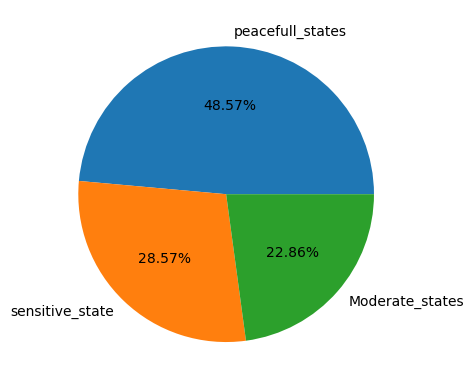

In [40]:
fig,ax=plt.subplots()
labels='peacefull_states','sensitive_state','Moderate_states'
ax.pie(state['sensitivity'].value_counts(),labels=labels,autopct='%1.2f%%')

In [44]:
peaceful_states['STATE/UT'].value_counts()

STATE/UT
A & N ISLANDS        1
MANIPUR              1
TRIPURA              1
SIKKIM               1
PUDUCHERRY           1
NAGALAND             1
MIZORAM              1
MEGHALAYA            1
LAKSHADWEEP          1
ARUNACHAL PRADESH    1
JAMMU & KASHMIR      1
HIMACHAL PRADESH     1
GOA                  1
DAMAN & DIU          1
D & N HAVELI         1
CHANDIGARH           1
UTTARAKHAND          1
Name: count, dtype: int64

In [45]:
sensitive_states['STATE/UT'].value_counts()

STATE/UT
ANDHRA PRADESH    1
BIHAR             1
GUJARAT           1
KARNATAKA         1
KERALA            1
MADHYA PRADESH    1
MAHARASHTRA       1
RAJASTHAN         1
TAMIL NADU        1
UTTAR PRADESH     1
Name: count, dtype: int64

In [46]:
moderate_states['STATE/UT'].value_counts()

STATE/UT
ASSAM           1
CHHATTISGARH    1
DELHI UT        1
HARYANA         1
JHARKHAND       1
ODISHA          1
PUNJAB          1
WEST BENGAL     1
Name: count, dtype: int64

In [49]:
corr=state.drop(columns='STATE/UT',axis=1)

In [50]:
corr.corr()

,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,sensitivity
MURDER,1.000000,0.961351,0.789579,0.745748,0.529990,0.745712,0.867515,0.841427,0.789341,0.743527,...,0.644429,0.929504,0.624450,0.686990,0.652152,0.444696,0.766058,0.633433,0.785926,0.473397
ATTEMPT TO MURDER,0.961351,1.000000,0.775725,0.707807,0.422905,0.707786,0.851166,0.821816,0.784410,0.645303,...,0.620166,0.942820,0.614208,0.629532,0.561474,0.460164,0.736387,0.684769,0.777063,0.397457
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,0.789579,0.775725,1.000000,0.486011,0.231694,0.486005,0.783958,0.808147,0.586776,0.401871,...,0.211379,0.883556,0.315058,0.544046,0.505758,0.201777,0.436619,0.322687,0.428302,0.265498
RAPE,0.745748,0.707807,0.486011,1.000000,0.407668,1.000000,0.646765,0.654081,0.517577,0.523034,...,0.694528,0.660311,0.867055,0.457777,0.687068,0.305699,0.626570,0.703638,0.790670,0.601741
CUSTODIAL RAPE,0.529990,0.422905,0.231694,0.407668,1.000000,0.407534,0.436927,0.409663,0.434975,0.611958,...,0.339054,0.352871,0.230657,0.289353,0.229473,0.344808,0.387163,0.262661,0.361777,0.484708
OTHER RAPE,0.745712,0.707786,0.486005,1.000000,0.407534,1.000000,0.646738,0.654058,0.517541,0.522970,...,0.694519,0.660298,0.867074,0.457761,0.687076,0.305663,0.626549,0.703642,0.790664,0.601703
KIDNAPPING & ABDUCTION,0.867515,0.851166,0.783958,0.646765,0.436927,0.646738,1.000000,0.983145,0.874874,0.607640,...,0.444228,0.853097,0.434010,0.518869,0.674039,0.392303,0.634418,0.528337,0.652418,0.503849
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,0.841427,0.821816,0.808147,0.654081,0.409663,0.654058,0.983145,1.000000,0.771576,0.522380,...,0.420164,0.826456,0.451267,0.537176,0.702995,0.255134,0.649912,0.525066,0.642448,0.491513
KIDNAPPING AND ABDUCTION OF OTHERS,0.789341,0.784410,0.586776,0.517577,0.434975,0.517541,0.874874,0.771576,1.000000,0.730348,...,0.432559,0.778835,0.314608,0.382279,0.482890,0.689087,0.485661,0.447301,0.568063,0.450986
DACOITY,0.743527,0.645303,0.401871,0.523034,0.611958,0.522970,0.607640,0.522380,0.730348,1.000000,...,0.416469,0.606092,0.310002,0.243350,0.406445,0.723718,0.478088,0.396740,0.537559,0.463355


<Axes: >

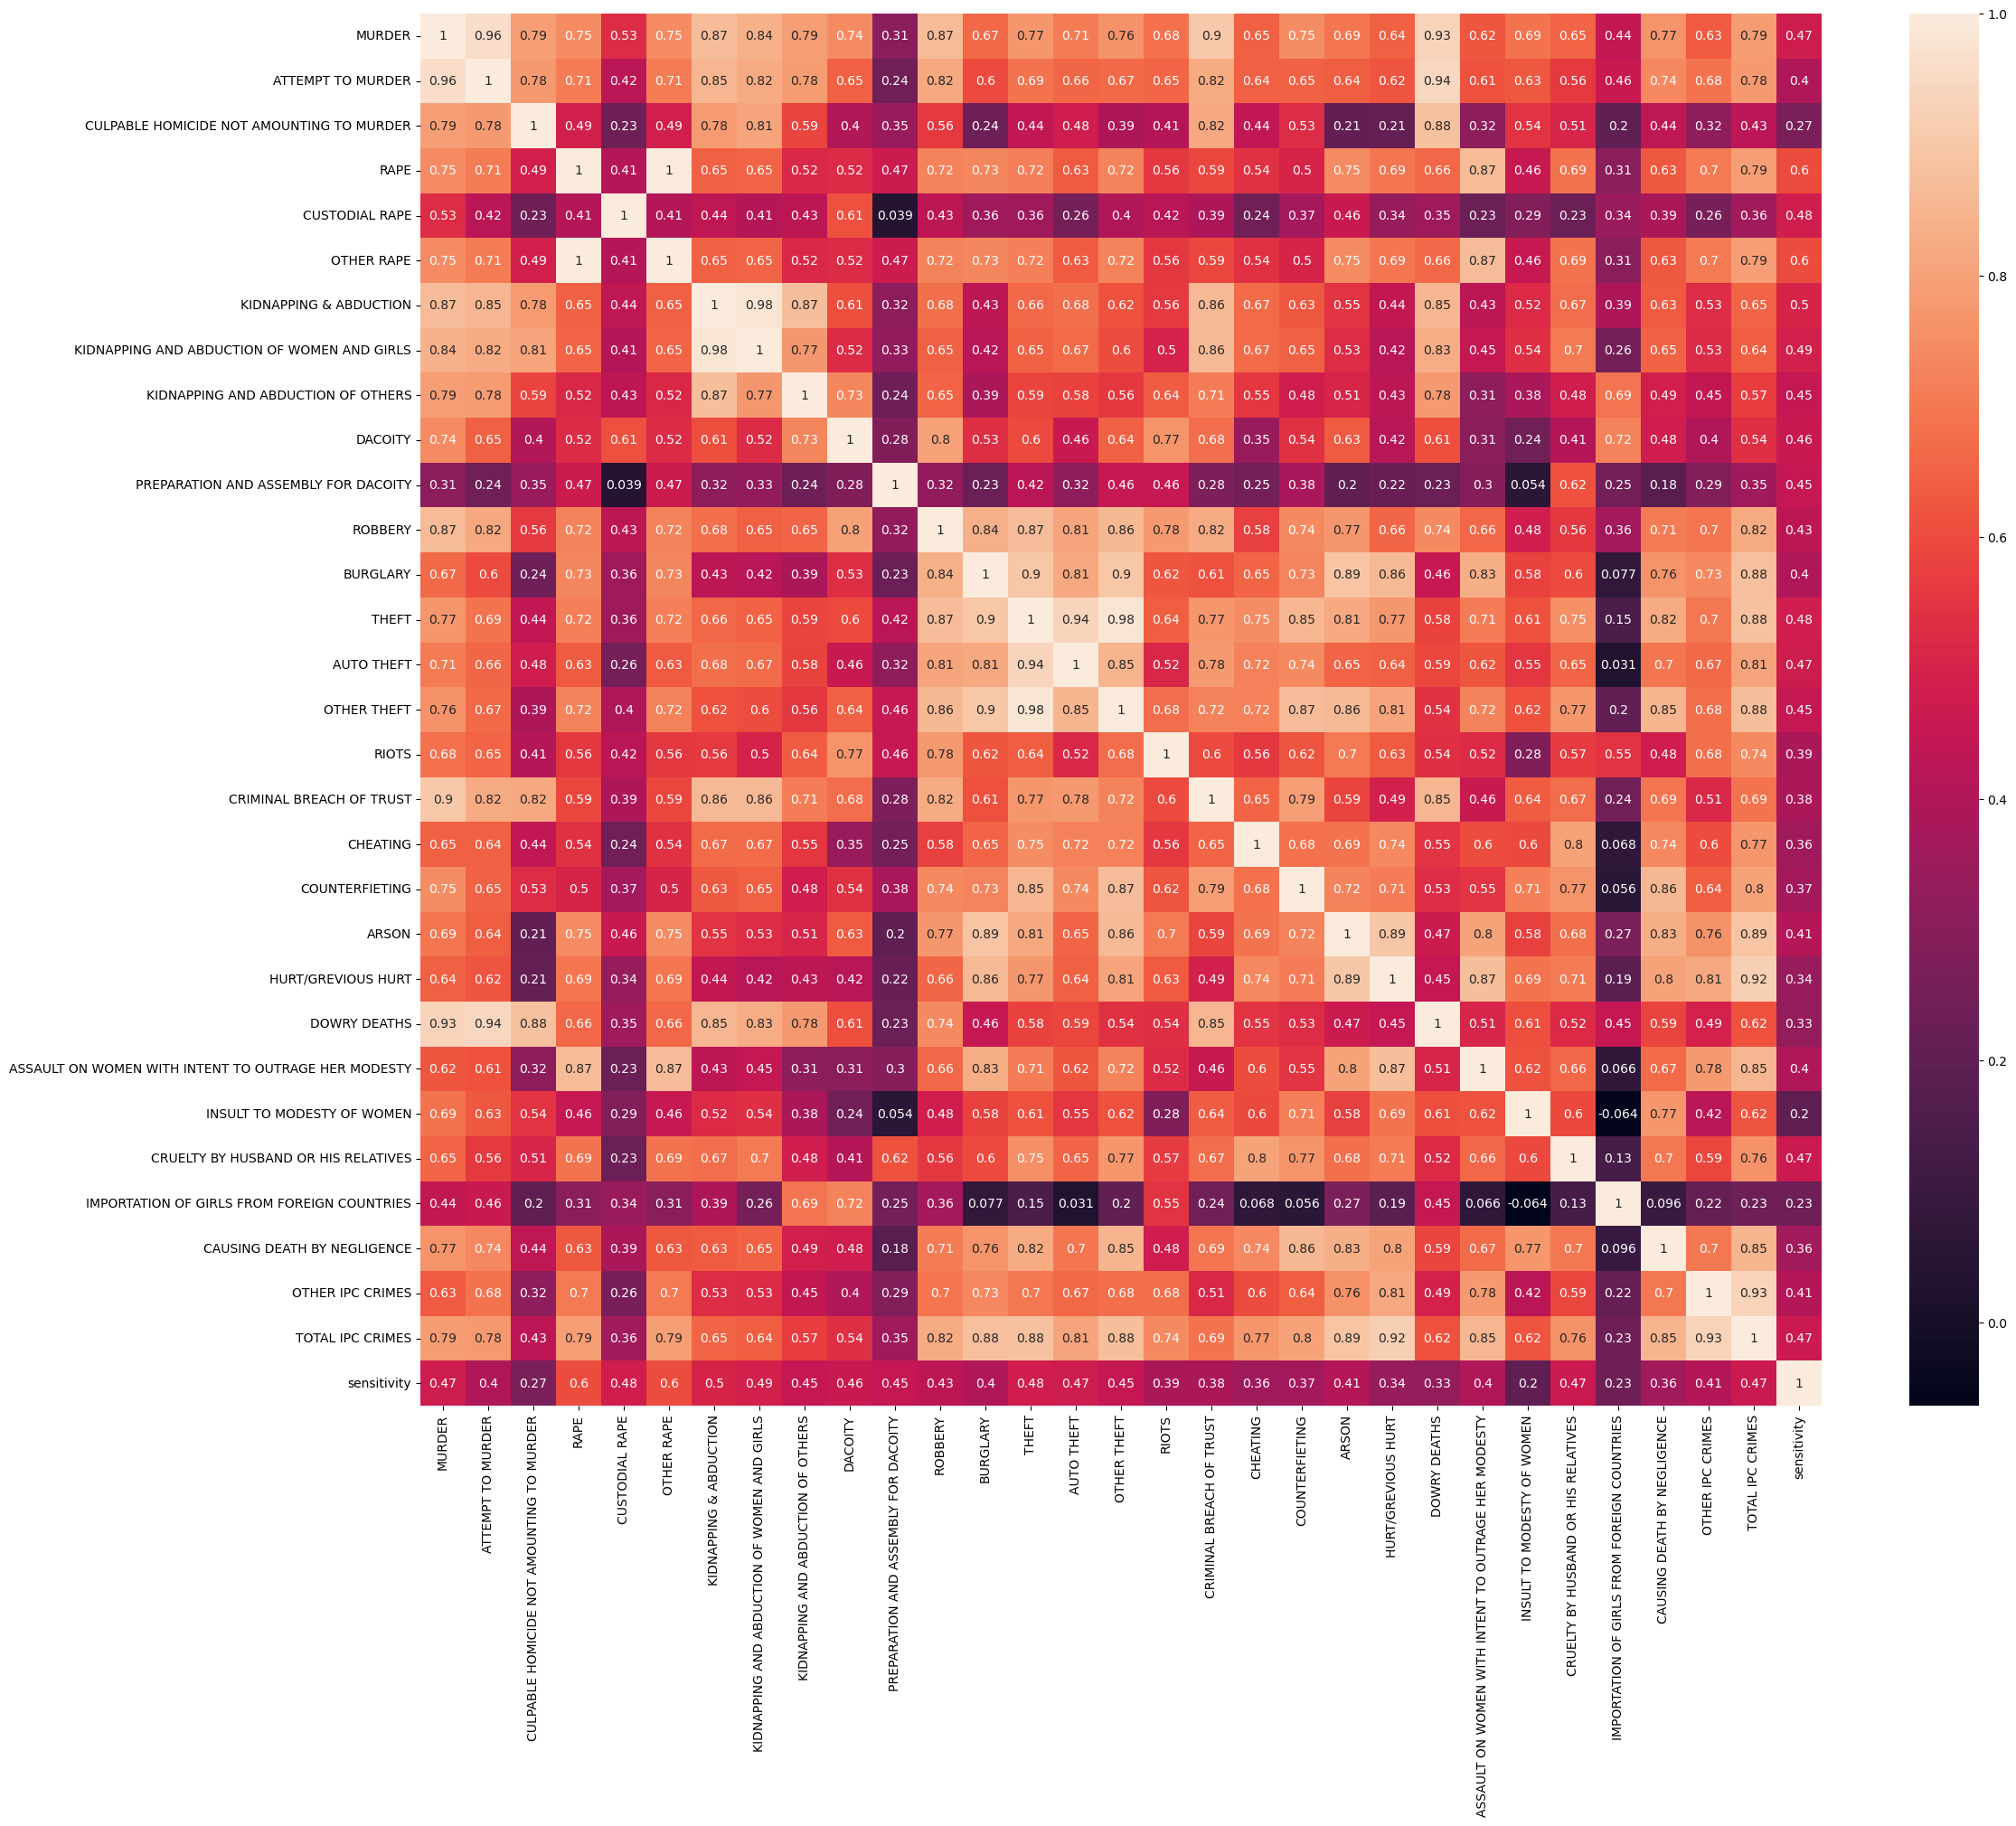

In [53]:
plt.figure(figsize=(25,20))
sns.heatmap(corr.corr(),annot=True)

## After Analysis Conclusion

- crime data suggests a potential correlation between population density and crime rates. States and Union Territories in the Northeast region and smaller Union Territories tend to have lower crime rates, possibly due to their sparse populations. Conversely, larger and more populous states often experience higher crime rates.

- An analysis of crime statistics in India reveals a significant disparity in public safety across various states. Madhya Pradesh exhibits the highest crime rates, with 2,413,770 reported Indian Penal Code (IPC) offenses and a total of 5,139,445 criminal incidents. Conversely, Lakshadweep demonstrates the lowest crime rates, recording merely 743 IPC crimes and a total of 1,607 crimes overall.

- Crime rates can be influenced by a multitude of factors, including substance abuse, the presence of organized criminal groups, insufficient law enforcement resources, limited educational attainment, societal prejudice, human trafficking, and inadequate infrastructure. Notably, gender inequality may be a particularly significant contributor to the prevalence of rape cases.

## 4.4) Capstone project overall story in your own words. Min 1000 words

In our culminating project, we undertook an in-depth examination of crime data within India. This analysis encompassed both states and union territories (UTs), delving further into specific districts. The data provided by Datatrained Academy spanned a twelve-year period, ranging from 2001 to 2012. We utilized eleven datasets to conduct our comprehensive investigation.

PHASE 1 was to collect the data and keep the collected data in a new file. The Data which we needed to collect was:-
1. The population of each state.

2. Literacy Rate in each state

3. Area of each state.

Phase 2 of the project involved a meticulous analysis of the data aggregated at the state and union territory (UT) level. This phase employed a multifaceted approach, encompassing:

- An investigation into the potential association between literacy rates and total crime rates.
- An examination of the correlations between crime types, literacy rates, and individual states.
- A longitudinal analysis of year-on-year total crime rate trends.
- An exploration of the potential influence of geographic area on overall crime levels.
- A comprehensive assessment of the relationship between population density and total crime rates.

The culmination of Phase 2 entailed a thorough analysis of each state/UT, culminating in the creation of detailed crime reports. These reports were meticulously crafted by synthesizing the insights gleaned from our diverse data sources.

Phase 3 transitioned the focus to the practical implementation of SQL operations. We were entrusted with the task of constructing SQL queries to manipulate the eleven datasets provided by Datatrained Academy. This phase centered on two key objectives:

- Data insertion: The initial objective entailed strategically inserting the data into a pre-defined table within a database management system.
- Data extraction: Following data insertion, we honed our SQL skills by formulating queries to extract specific information tailored to pre-determined requirements.
    
To further augment our analytical prowess, we not only utilized DataFrames to effectively organize and store the extracted data but also culminated Phase 3 by employing data visualization techniques to glean deeper insights from the processed information.

Phase 4 ventured into the domain of unsupervised machine learning, specifically utilizing clustering techniques. The overarching goal was to establish distinct categories for the data, reflecting areas of varying crime levels – peaceful, moderate, and sensitive. To achieve this, we commenced by consolidating the data at the state level. Subsequently, we employed the K-Means algorithm, a well-established clustering method. This resulted in the successful segmentation of the data into three clusters: Cluster 0 (moderate), Cluster 1 (sensitive), and Cluster 2 (moderate).

Following the meticulous data segmentation process, we constructed dedicated DataFrames for each of the three clusters. This granular approach facilitated a deeper examination of the data within each crime-level category. Our subsequent in-depth exploration yielded significant insights. Notably, we were able to identify Madhya Pradesh as the state exhibiting the highest crime rates, and Lakshadweep as the state with the lowest, effectively classifying them as the most unsafe and safest states, respectively.